# Pymaceuticals Inc.
---

### Analysis

Background:

As a senior data analyst for Pymaceuticals, Inc., a pharmaceutical company that focuses on anti-cancer medications. I was given an assignment to generate all tables and figures necessary to complete a technical report for a clinical study. The study was performed in 249 mice that were identified with (SCC) tumors - a commonly known form of skin cancer. All mices received a treatment with some drug regimens over a period of 45 days, during this period, the tumors were observed and measured. In addition to providing the tables and figures below, I was asked to provide a top-level summary of the results. 

We tested 10 different drug regimens as listed under the bar graphic below. The majority of the mice were treated with Capomulini and Ramicane and the smaller population were treated with Propriva. The female and male population was almost even, being 49% female versus 51% male. 

As the drug regimen Capomulin was used in most of the mice population, I performed the following analysis under this drug:
- Correlation between the mice weight and the average tumor volume - represented under the scatter plot table below, and I found a strong positive correction of 0.84
- Capomulini had a standard deviation of 4.99, meaning of all the drug regimes it had the lowest variability to the mean
- Capomulin had the lowest tumor volume and variance; therefore it can be concluded that it is the most effective agent out of all regimen tested
- Isolating the mouse ID l509 we can observe that it took 20 days for Capomulin to take effect

Although my conclusion is that Capomulini is an effective drug, there are limitations to my analysis as the drug Ramicane was tested in the majority of the mice as well; therefore, a sample population across these two drugs would probably provide a better comparison point.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
study_results_path = "data/Study_results.csv"
mouse_metadata_path = "data/Mouse_metadata.csv"
new_df_path= ("data/new_df.csv")

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)



# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer" )

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()

print(f'Total mice population was: {number_mice}')

Total mice population was: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice_df = merge_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)

In [4]:


duplicated_mice_ID_df = merge_df.loc[duplicated_mice_df, "Mouse ID"].unique()
duplicated_mice_ID_df

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_Summary = merge_df.loc[merge_df['Mouse ID'] == duplicated_mice_ID_df[0]]
duplicated_mice_ID_Summary

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = merge_df.drop(duplicated_mice_ID_Summary.index)
new_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
#save the new clean dataframe
new_df.to_csv("data/new_df.csv", index=False, header=True)


In [8]:
# Checking the number of mice in the clean DataFrame.
new_count_mice = new_df["Mouse ID"].nunique()
new_count_mice
print(f'Total number of unique mice for all reginem is: {new_count_mice}')

Total number of unique mice for all reginem is: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_grouped = new_df.groupby(["Drug Regimen"])


# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_var = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

regimen_stats=pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                            "Median Tumor Volume" : regimen_median,
                            "Tumor Volume Variance" : regimen_var,
                            "Tumor Volume Std Deviation Err" : regimen_std,
                            "SEM" : regimen_sem})
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation Err,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line.

Tumor_Volume_df=pd.DataFrame({"Mean" : regimen_mean,
                             "Median" : regimen_median,
                             "var" : regimen_var,
                             "Std" : regimen_std,
                             "SEM" : regimen_sem})
print("Tumor Volume (mm3)")
Tumor_Volume_df

Tumor Volume (mm3)


,Mean,Median,var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
mice_tested_Count=regimen_grouped["Mouse ID"].count().sort_values(ascending=False)
mice_tested_Count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

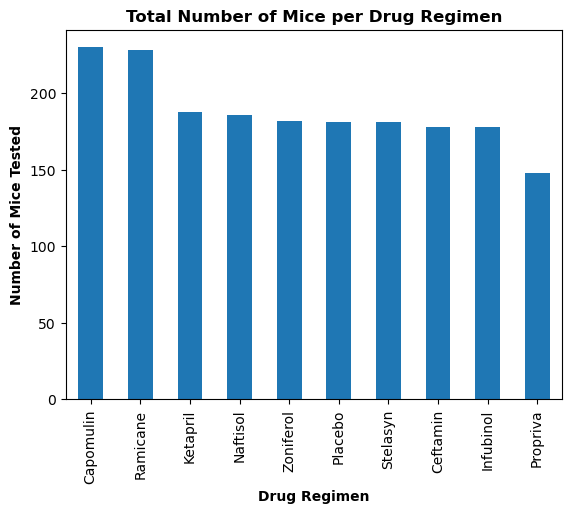

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_Count=regimen_grouped["Mouse ID"].count().sort_values(ascending=False)

pd_bar_mice_tested= mice_tested_Count.plot(kind="bar", width=0.5)


# Configure plot, figsize, title, and axis labels
pd_bar_mice_tested.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pd_bar_mice_tested.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_tested.set_ylabel('Number of Mice Tested', fontweight = 'bold')

# Show plot
plt.show()

In [13]:
regimen_name=regimen_grouped["Drug Regimen"].nunique()
regimen_name


Drug Regimen
Capomulin    1
Ceftamin     1
Infubinol    1
Ketapril     1
Naftisol     1
Placebo      1
Propriva     1
Ramicane     1
Stelasyn     1
Zoniferol    1
Name: Drug Regimen, dtype: int64

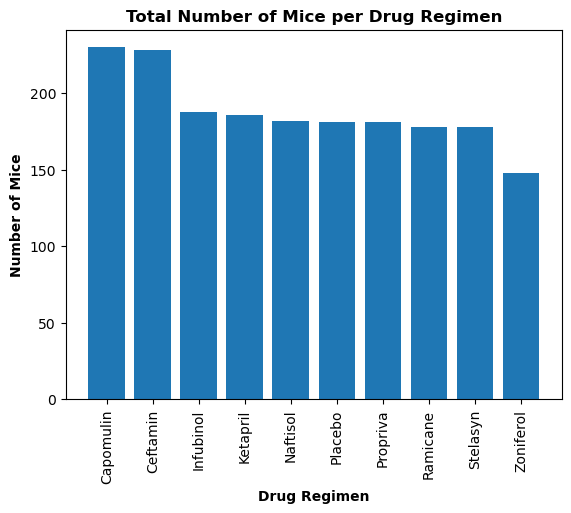

In [14]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis= np.arange(len(regimen_grouped))
regimen_name_list=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva", "Ramicane","Stelasyn","Zoniferol"]

regimen_name=regimen_grouped["Drug Regimen"].count().sort_values(ascending=False)

#plot bar chart
pyplot_mice = plt.bar(x_axis, regimen_name)
plt.xticks(x_axis, regimen_name_list, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')
plt.show()    

(-1.1057967798535038,
 1.1171944866462704,
 -1.1079077057918647,
 1.1109193649436655)

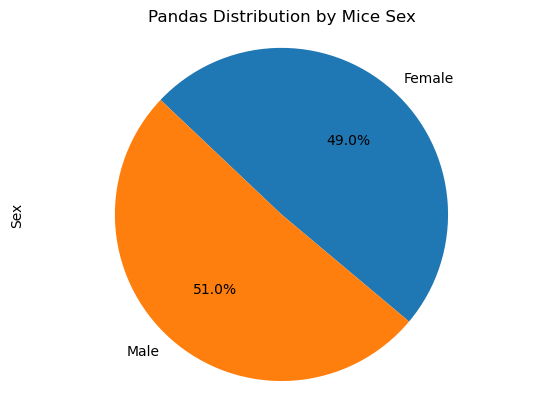

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = new_df.groupby("Sex")["Sex"].count()

#generate pd pie chart
pandas_pie_plot= mice_sex.plot(kind="pie",autopct = "%1.1f%%", title="Pandas Distribution by Mice Sex", startangle=320)
plt.axis("equal")


(-1.1272585351526159,
 1.1101410553673792,
 -1.1228276690280699,
 1.1104295916068467)

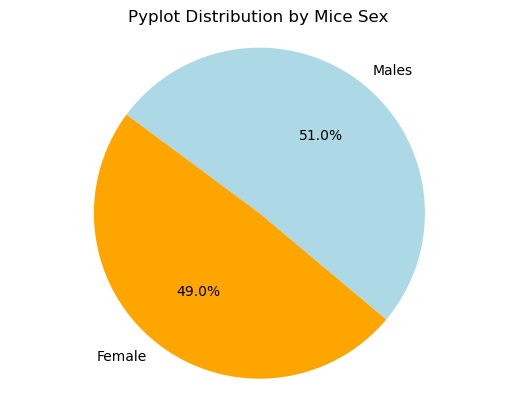

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Males", "Female"]

# The values of each section of the pie chart
sizes = new_df["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, 
        autopct="%1.1f%%",  startangle=320)
plt.title("Pyplot Distribution by Mice Sex")

#to create a round pie
plt.axis("equal")
        


## Quartiles, Outliers and Boxplots

In [17]:
# Focus only on four regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse
final_tumor_vol = new_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=["Capomulin", "Ramicane", "Infubinol","Regimen","Ceftamin"] 

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in regimen:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

   
    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                                  | (final_tumor_vol > upper_bound)]
    
     # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} potential outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} potential outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of potential outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Potential Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------------------------------------')


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 potential outliers.
Final tumor volume(mm3) for Capomulin above 51.83 potential outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of potential outliers for Capomulin is: 0
----------------------------------------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 potential outliers.
Final tumor volume(mm3) for Ramicane above 54.31 potential outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of potential outliers for Capomulin is: 0
----------------------------------------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 potential outliers.
Final tumor volume(mm3) for Infubinol above 82.74 potential outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of potential outliers for Capomulin is: 1
Potential Outlier final tumor volume(mm3) is 36.32
-----

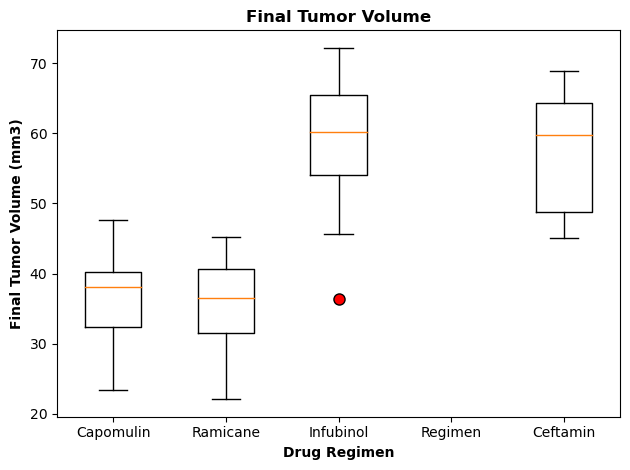

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={"markerfacecolor":"r",'markersize': 8})

# Set x/y label, title
final_tumor_plot.set_title("Final Tumor Volume", fontweight="bold")
final_tumor_plot.set_xlabel("Drug Regimen", fontweight="bold")
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)", fontweight="bold")

# Save box plot graph to Images folder
plt.tight_layout()
final_tumor_plot.figure.savefig("data/final_tumor_boxplot.png")

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()


## Line and Scatter Plots

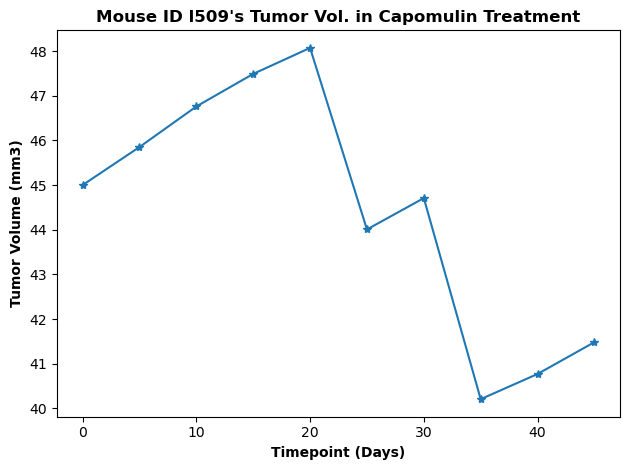

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin"]

mouse_id = "l509"
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

#generate the line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*')

# setup x_y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Save line graph to Images folder
plt.tight_layout()
plt.savefig('data/l509_tumor_plot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Correlation and Regression

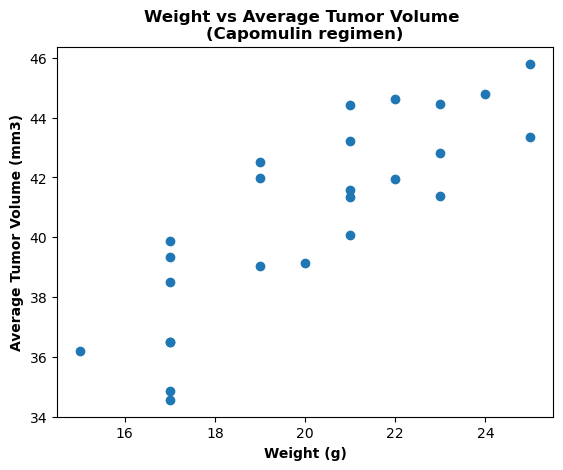

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID

capomulin_gp = capomulin_df.groupby("Mouse ID").mean()
mice_weight_avg = capomulin_gp["Weight (g)"]
mice_tumor_avg = capomulin_gp["Tumor Volume (mm3)"]

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Set x/y label, title
plt.title("Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight="bold")
plt.xlabel("Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight="bold")

# Save box plot graph to Images folder
plt.savefig("data/scatter_weight_tumor.png")

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()


The correlation between mouse weight and tumor vol is 0.84


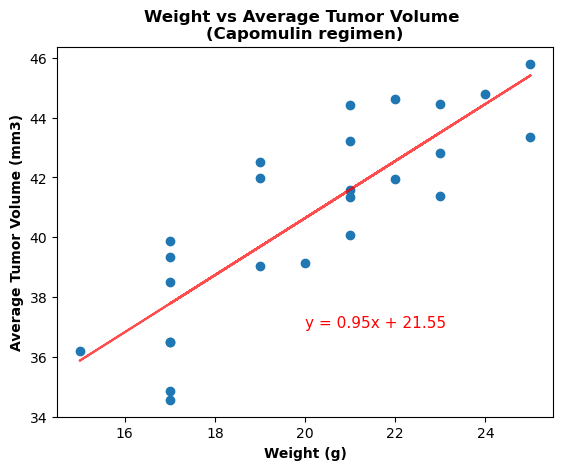

In [30]:
# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)


# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig("data/scatter_weight_tumor_linear.png")

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()